In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('spam.csv',encoding='Windows-1252')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
import chardet
with open('spam.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

## Data Cleaning

In [5]:
df.shape

(5572, 5)

In [6]:
df.v1.unique()

array(['ham', 'spam'], dtype=object)

In [7]:
df['v1']=np.where(df['v1']=='spam',1,0)

In [8]:
df['v1'].unique()

array([0, 1])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   int32 
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: int32(1), object(4)
memory usage: 196.0+ KB


In [10]:
#As we can see the values in the last 3 columns are almost nan therefore we can remove those columns

In [11]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [12]:
df.head(5)

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df=df.rename(columns={'v1':'target','v2':'text'})

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
df.duplicated().sum()

403

We have 403 duplicate values which we have to drop

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

## EDA

In [20]:
df.describe()

,target
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

Text(0.5, 0, 'Spam or Not Spam')

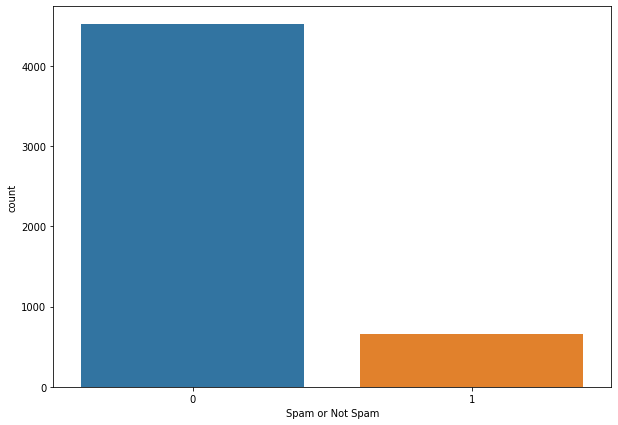

In [23]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x='target')
plt.xlabel('Spam or Not Spam')

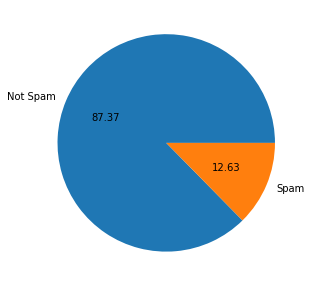

In [24]:
plt.figure(figsize=(10,5))
plt.pie(df['target'].value_counts(),labels=['Not Spam','Spam'],autopct="%0.2f")
plt.show()

In [25]:
# DSata Is imbalanced

In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\utkar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
df['num_characters']=df['text'].apply(len)

In [28]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
#Fetching words count
df['word_count']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [32]:
df.head()

,target,text,num_characters,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [33]:
df['sent_count']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [34]:
df.head()

,target,text,num_characters,word_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [172]:
df[['num_characters','word_count','sent_count']].describe()

,num_characters,word_count,sent_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
#not spam
df.loc[df['target']==0].describe()

,target,num_characters,word_count,sent_count
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [38]:
#spam
df.loc[df['target']==1].describe()

,target,num_characters,word_count,sent_count
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


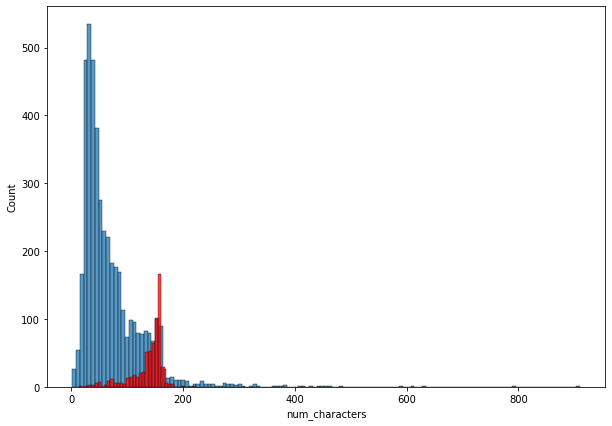

In [43]:
plt.figure(figsize=(10,7))
sns.histplot(x=df[df['target']==0]['num_characters'])
sns.histplot(x=df[df['target']==1]['num_characters'],color='red')
plt.show()

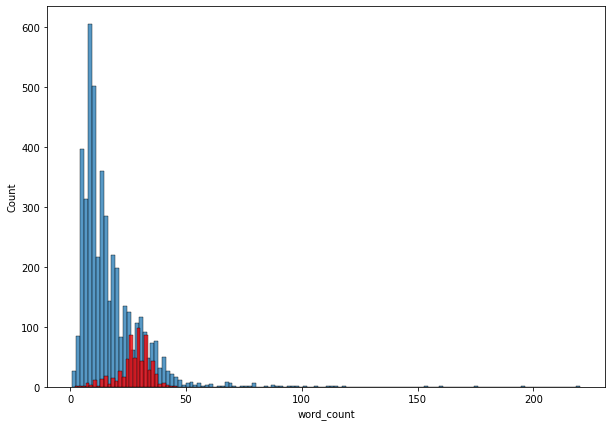

In [51]:
plt.figure(figsize=(10,7))
sns.histplot(x=df[df['target']==0]['word_count'])
sns.histplot(x=df[df['target']==1]['word_count'],color='red')
plt.show()

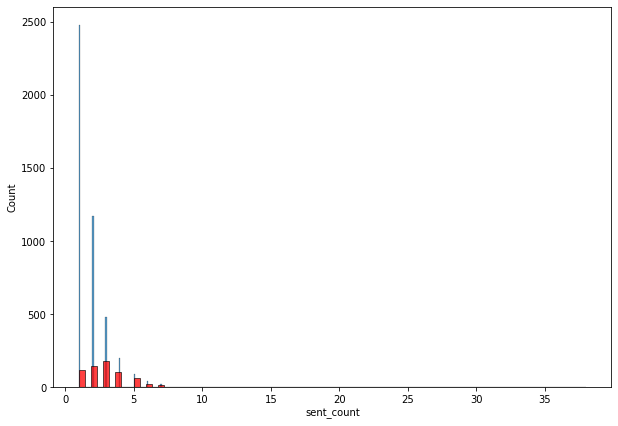

In [52]:
plt.figure(figsize=(10,7))
sns.histplot(x=df[df['target']==0]['sent_count'])
sns.histplot(x=df[df['target']==1]['sent_count'],color='red')
plt.show()

<Figure size 720x504 with 0 Axes>

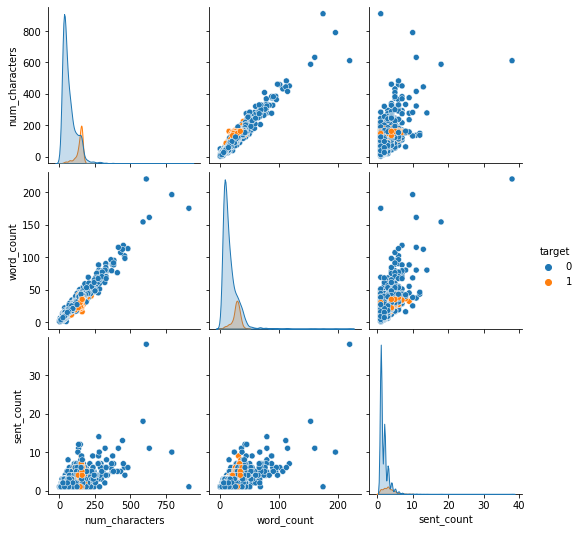

In [55]:
plt.figure(figsize=(10,7))
sns.pairplot(df,hue='target')
plt.show();

<AxesSubplot:>

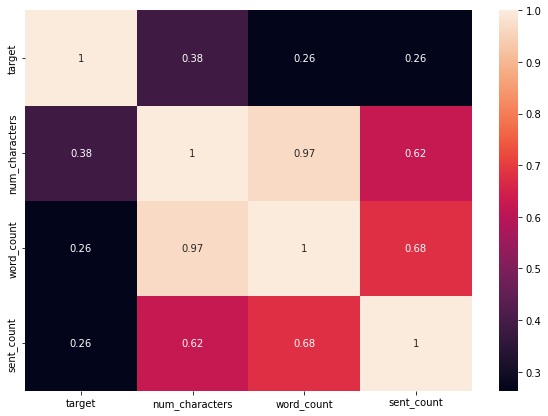

In [58]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

## Data/Text Processing
- Lower case
- Tokenization
- Removing Special Characters
- Removing stop words and punctuation
- stemming

In [95]:
from nltk.corpus import stopwords
import string
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [89]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utkar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [97]:
transform_text('Hi Whats YOUR%% !! Name UTkarsh.MY name is Utkarsh Im danceing')

'hi what name name utkarsh im danc'

In [91]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [98]:
df['transformed_text']=df['text'].apply(transform_text)

In [99]:
df.head()

,target,text,num_characters,word_count,sent_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Creating wordcloud

In [100]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/5a/5f/f4164295d6853ec6203bc728dea4da76a7145ba70482eab9e994d26e0e13/wordcloud-1.9.2-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 152.1/152.1 kB 1.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [101]:
from wordcloud import WordCloud

In [102]:
wc=WordCloud(width=600,height=600,background_color='white',min_font_size=10)

In [104]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

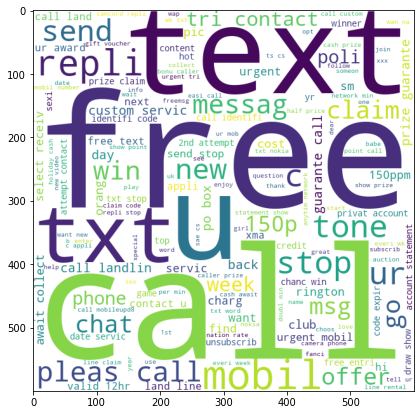

In [106]:
plt.figure(figsize=(10,7))
plt.imshow(spam_wc)

In [107]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

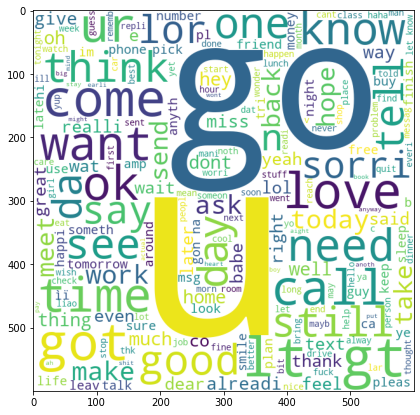

In [108]:
plt.figure(figsize=(10,7))
plt.imshow(ham_wc)

In [113]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [114]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


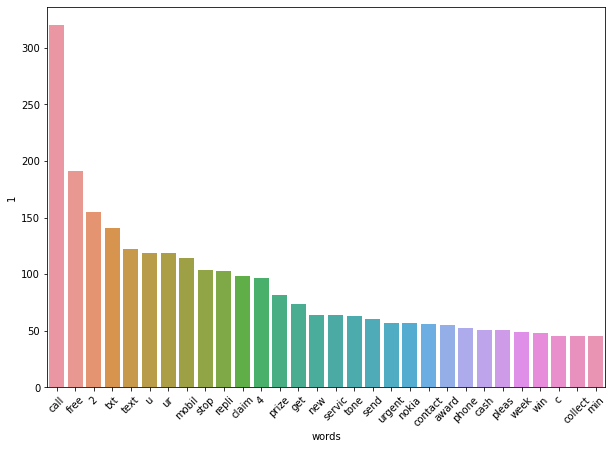

In [132]:
from collections import Counter
plt.figure(figsize=(10,7))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation=45)
plt.xlabel('words')
plt.show();

In [133]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


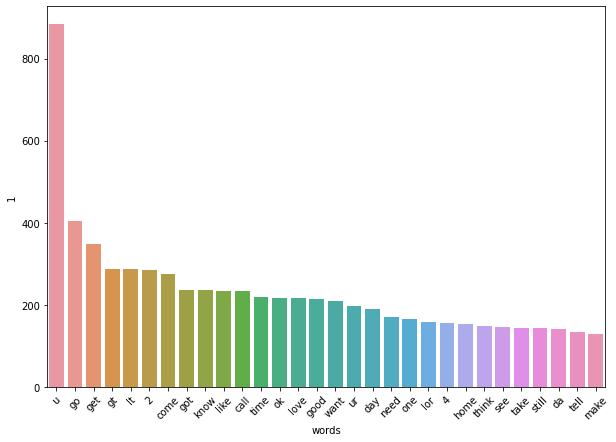

In [134]:
from collections import Counter
plt.figure(figsize=(10,7))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation=45)
plt.xlabel('words')
plt.show();

## Model Building

In [136]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [181]:
vector=CountVectorizer()
X=vector.fit_transform(df['transformed_text']).toarray()

In [182]:
X.shape

(5169, 6708)

In [138]:
y=df['target']

In [135]:
from sklearn.model_selection import train_test_split

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [140]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [175]:
def model_selection(model,X_train, X_test, y_train, y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print("Accuracy Score",accuracy_score(y_test,y_pred))
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("Precision Score",precision_score(y_test,y_pred))

In [184]:
#GaussianNB
clf=GaussianNB()
model_selection(clf,X_train,X_test,y_train,y_test)

Accuracy Score 0.8800773694390716
Confusion Matrix:
 [[792 104]
 [ 20 118]]
Precision Score 0.5315315315315315


In [185]:
clf=MultinomialNB()
model_selection(clf,X_train,X_test,y_train,y_test)

Accuracy Score 0.9642166344294004
Confusion Matrix:
 [[871  25]
 [ 12 126]]
Precision Score 0.8344370860927153


In [187]:
clf=BernoulliNB()
model_selection(clf,X_train,X_test,y_train,y_test)

Accuracy Score 0.9700193423597679
Confusion Matrix:
 [[893   3]
 [ 28 110]]
Precision Score 0.9734513274336283


We can observe GuassianNB gives better accuracy and precision score. Now let's try to increase it.
- For the first step we'll take tf-id vectoriser

In [191]:
vector=TfidfVectorizer()
X=vector.fit_transform(df['transformed_text']).toarray()

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [193]:
#GaussianNB
clf=GaussianNB()
model_selection(clf,X_train,X_test,y_train,y_test)

Accuracy Score 0.8762088974854932
Confusion Matrix:
 [[793 103]
 [ 25 113]]
Precision Score 0.5231481481481481


In [194]:
clf=MultinomialNB()
model_selection(clf,X_train,X_test,y_train,y_test)

Accuracy Score 0.9593810444874274
Confusion Matrix:
 [[896   0]
 [ 42  96]]
Precision Score 1.0


In [195]:
clf=BernoulliNB()
model_selection(clf,X_train,X_test,y_train,y_test)

Accuracy Score 0.9700193423597679
Confusion Matrix:
 [[893   3]
 [ 28 110]]
Precision Score 0.9734513274336283


This time we can observe significant changes in accuracy and precision.
- MultiNomial Gives more highest precision_score. Iis is most imporrtant as our data is imbalanced

### Hyperparameter Tuning

In [196]:
vector=TfidfVectorizer(max_features=3000)
X=vector.fit_transform(df['transformed_text']).toarray()

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [198]:
#GaussianNB
clf=GaussianNB()
model_selection(clf,X_train,X_test,y_train,y_test)

Accuracy Score 0.8694390715667312
Confusion Matrix:
 [[788 108]
 [ 27 111]]
Precision Score 0.5068493150684932


In [202]:
clf=MultinomialNB()
model_selection(clf,X_train,X_test,y_train,y_test)

Accuracy Score 0.9709864603481625
Confusion Matrix:
 [[896   0]
 [ 30 108]]
Precision Score 1.0


In [200]:
clf=BernoulliNB()
model_selection(clf,X_train,X_test,y_train,y_test)

Accuracy Score 0.9835589941972921
Confusion Matrix:
 [[895   1]
 [ 16 122]]
Precision Score 0.991869918699187


In [203]:
import pickle
pickle.dump(vector,open('vector.pkl','wb'))
pickle.dump(clf,open('model.pkl','wb'))